<h1>Problem Statement</h1> 
<p><i>For easy reference</i></p>
<p>Objective: develop a model that recommends the best financial advisors for individual customers through various techniques such as recommendation systems, supervised learning models, or unsupervised learning models. Used to assign the most suitable financial advisors to customers.</p>

In [539]:
import pandas as pd 
import os #for reading files
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
import seaborn as sns
path = "./final_nus_datathon_dataset"

In [540]:
#!pip install pyarrow 
#^if you need to install pyarrow uncomment

<h3>Load Data</h3>

In [541]:
dfs = dict()
files = os.listdir(path)

print("Naming Convention:")
for i in range(len(files)):
    _,*filename,_,_ = files[i].split("_") 
    dfs[filename[0]] = pd.read_parquet(f"{path}/{files[i]}") 
    print("dfs[\"",filename[0],"\"]", ":", files[i])
               


Naming Convention:
dfs[" policy "] : nus_policy_info_df.parquet
dfs[" client "] : nus_client_info_df.parquet
dfs[" final "] : sample_final_modelling_df.parquet
dfs[" agent "] : nus_agent_info_df.parquet


<h3>Description of Dataset</h3>
<p>I just put the table from the Problem Statemen docs under each respective dataset for easy ref</p>

In [542]:
dfs["policy"].head()

,chdrnum,agntnum,secuityno,occdate,annual_premium,product,flg_main,flg_rider,flg_inforce,flg_lapsed,flg_cancel,flg_expire,flg_converted,product_grp,cust_age_at_purchase_grp,cust_tenure_at_purchase_grp
0,PID:281,AIN:62,CIN:6957,2018-11-12,0.0,prod_8,1,0,1,0,0,0,1,PG:0,AG05_35to39,TNR2_lt1yr
1,PID:280,AIN:63,CIN:2161,2024-02-22,7.0,prod_8,1,0,1,0,0,0,1,PG:0,AG04_30to34,TNR4_4to8yr
2,PID:2577,AIN:63,CIN:16605,2024-08-28,423.0,prod_6,1,0,1,0,0,0,1,PG:0,AG08_50to54,TNR5_8yrup
3,PID:2578,AIN:63,CIN:16605,2024-08-27,217.0,prod_6,1,0,1,0,0,0,1,PG:0,AG08_50to54,TNR5_8yrup
4,PID:305,AIN:63,CIN:7917,2024-08-28,432.0,prod_6,1,0,1,0,0,0,1,PG:0,AG07_45to49,TNR4_4to8yr


<table>
<thead>
<tr><th>Column Name</th><th>Purpose</th></tr>
</thead>
<tbody>
<tr><td>chdrnum</td><td> unique identifier for policy</td></tr>
<tr><td>agntnum</td><td> unique identifier for agent</td></tr>
<tr><td>secuityno</td><td> unique identifier for customer</td></tr>
<tr><td>occdate</td><td> inception date of policy</td></tr>
<tr><td>annual_premium</td><td> annual premium</td></tr>
<tr><td>product</td><td> product of the policy</td></tr>
<tr><td>product_grp </td><td> product group of the policy</td></tr>
<tr><td>flg_main </td><td> flag indicating the main policyholder</td></tr>
<tr><td>flg_inforce </td><td> flag indicating a policy that is in force</td></tr>
<tr><td>flg_cancel </td><td> flag indicating a policy that is cancelled</td></tr>
<tr><td>flg_expire </td><td> flag indicating a policy that expired</td></tr>
<tr><td>flg_converted </td><td> flag indicating a policy that is converted</td></tr>
<tr><td>cust_age_purchase_grp</td><td> customer's age group at purchase</td></tr>
<tr><td>cust_teure_at_purchase_grp</td><td> customer's tenure at purchase</td></tr>
</tbody>
</table>

In [543]:
dfs["agent"].head()

,agntnum,agent_age,agent_gender,agent_marital,agent_tenure,cnt_converted,annual_premium_cnvrt,pct_lapsed,pct_cancel,pct_inforce,pct_prod_0_cnvrt,pct_prod_1_cnvrt,pct_prod_2_cnvrt,pct_prod_3_cnvrt,pct_prod_4_cnvrt,pct_prod_5_cnvrt,pct_prod_6_cnvrt,pct_prod_7_cnvrt,pct_prod_8_cnvrt,pct_prod_9_cnvrt,pct_SX0_unknown,pct_SX1_male,pct_SX2_female,pct_AG01_lt20,pct_AG02_20to24,pct_AG03_25to29,pct_AG04_30to34,pct_AG05_35to39,pct_AG06_40to44,pct_AG07_45to49,pct_AG08_50to54,pct_AG09_55to59,pct_AG10_60up,cluster,agent_product_expertise
0,AIN:9513,32.0,M,M,15.0,21.0,1.004900e+04,1.0,0.814954,0.000000,0.0,0.0,0.285714,0.0,0.523810,0.0,0.190476,0.0,0.000000,0.000000,0.0,0.333333,0.666667,0.000000,0.238095,0.142857,0.000000,0.000000,0.000000,0.000000,0.238095,0.142857,0.238095,3,"[prod_2, prod_6]"
1,AIN:4310,40.0,M,M,18.0,396.0,1.971080e+05,0.6,0.083937,0.429293,0.0,0.0,0.128788,0.0,0.005051,0.0,0.462121,0.0,0.292929,0.111111,0.0,0.601010,0.398990,0.012626,0.012626,0.131313,0.388889,0.116162,0.184343,0.083333,0.020202,0.040404,0.010101,6,[prod_6]
2,AIN:4302,39.0,F,M,40.0,853.0,5.106351e+05,0.3,0.017406,0.711606,0.0,0.0,0.242673,0.0,0.083236,0.0,0.436108,0.0,0.109027,0.128957,0.0,0.695193,0.304807,0.010551,0.030481,0.137163,0.144197,0.177022,0.311841,0.106682,0.036342,0.035170,0.010551,6,[prod_4]
3,AIN:4996,57.0,F,D,41.0,554.0,3.514724e+05,0.3,0.003623,0.584838,0.0,0.0,0.194946,0.0,0.083032,0.0,0.436823,0.0,0.061372,0.223827,0.0,0.397112,0.602888,0.018051,0.005415,0.009025,0.128159,0.108303,0.234657,0.162455,0.135379,0.160650,0.037906,6,"[prod_7, prod_9, prod_6, prod_0, prod_2]"
4,AIN:3457,38.0,M,M,62.0,1525.0,1.215380e+06,0.3,0.017523,0.640656,0.0,0.0,0.145574,0.0,0.047869,0.0,0.620328,0.0,0.114098,0.072131,0.0,0.626885,0.373115,0.013115,0.035410,0.069508,0.201311,0.215082,0.214426,0.108197,0.084590,0.043279,0.015082,6,"[prod_6, prod_8]"


<table>
<thead>
<tr><th>Column Name</th><th>Purpose</th></tr>
</thead>
<tbody>
<tr><td>agent_age</td><td> agent’s age </td></tr>
<tr><td>agent_gender</td><td> agent’s gender </td></tr>
<tr><td>agent_marital</td><td> agent’s marital status </td></tr>
<tr><td>agent_tenure</td><td> agent’s tenure with the company </td></tr>
<tr><td>cnt_converted</td><td> count of policies converted by agent </td></tr>
<tr><td>annual_premium_cnvrt</td><td> total annual premium from converted policies by agent </td></tr>
<tr><td>pct_lapsed</td><td> percentage of policies that are currently lapsed </td></tr>
<tr><td>pct_cancel</td><td> percentage of policies that are currently cancelled </td></tr>
<tr><td>pct_inforce</td><td> percentage of policies that are currently in force </td></tr>
<tr><td>Percentage of customers’ gender handled by the agent</td><td> pct_sx0_unknown, pct_sx1_male, pct_sx2_female </td></tr>

<tr><td>Percentage of products sold by agent</td><td> pct_prod_0_cnvrt, pct_prod_1_cnvrt, ..., pct_prod_9_cnvrt</td></tr>

<tr><td>Percentage of customers’ age groups handled by the agent</td><td> pct_ag01_lt20, pct_ag02_20to24, ..., pct_ag10_60up </td></tr>
<tr><td>cluster</td><td> an old segment that the agent belongs to </td></tr>
<tr><td>agent_product_expertise</td><td> a list of products the agent is comfortable selling (based on feedback) </td></tr>
</tbody>
</table>


In [544]:
dfs["client"].head()

,secuityno,cltsex,cltdob,marryd,race_desc_map,cltpcode,household_size,economic_status,family_size,household_size_grp,family_size_grp
0,CIN:14264,F,1993-02-17,M,Chinese,545686,1,76,56,HH1_lt40,FS3_40to60
1,CIN:7188,F,1977-06-15,M,Chinese,308364,72,96,90,HH2_40to80,FS5_80up
2,CIN:13608,F,1998-02-12,S,Chinese,387393,28,93,23,HH1_lt40,FS2_20to40
3,CIN:5087,F,1972-10-25,M,Chinese,640469,84,51,34,HH3_80to100,FS2_20to40
4,CIN:18531,M,1984-12-27,M,Others,763318,92,18,73,HH3_80to100,FS4_60to80


<table>
<thead>
<tr><th>Column Name</th><th>Purpose</th></tr>
</thead>
<tbody>
<tr><td>secuityno</td><td> unique identifier for customer</td></tr>
<tr><td>cltsex</td><td> gender of customer</td></tr>
<tr><td>cltdob</td><td> date of birth of customer</td></tr>
<tr><td>marryd</td><td> marital status of customer</td></tr>
<tr><td>race_desc_map</td><td> race of customer</td></tr>
<tr><td>cltpcode</td><td> customer postal code</td></tr>
<tr><td>household_size</td><td> household size (based on postal code)</td></tr>
<tr><td>economic_status</td><td> economic status (based on postal code)</td></tr>
<tr><td>family_size</td><td> family size (based on postal code)</td></tr>
<tr><td>household_size_grp</td><td> discretized household size of customer</td></tr>
<tr><td>family_size_grp</td><td> discretized family size of customer</td></tr>
</tbody>
</table>

In [545]:
#removing NAs
for name in dfs:
    rows_before = len(dfs[name])
    dfs[name] = dfs[name].dropna() 
    rows_after = len(dfs[name])
    print(f"Dataset '{name}': Before {rows_before} After {rows_after}")

print("complete")

Dataset 'policy': Before 29503 After 29503
Dataset 'client': Before 20000 After 19647
Dataset 'final': Before 29503 After 29477
Dataset 'agent': Before 10129 After 10117
complete


<h3>Quesions</h3>
For <code>client</code> df what in the world are:
<ul> 
<li>family_size_grp (is the suff after the _ the average range?)</li> 
<li>hh size grp (lt? there's also non lt)</li> 
<li>whya are the "size" numbers so big lmao</li>
<li>there's also a discretized version of everything</li>
<li>should we use birth date to figure out their age to compare advisor age and client age better?</li>
</ul>

For <code>policy</code> df
<ul> 
<li>one of the (non-main)flag columns can be dropped right</li>
<li>what do we do with flag_main lol?</li>
</ul>

For <code>agent</code> df
<ul>
<li>Shld we reformat the pct stuff?</li>
<li>cluster?</li>



In [546]:
#Some Ideas: 

#should pct cancel for agent should be reversed for customers with high cancel?
#high expiry with high expiry? 
#correlation between age? 


<h2>EDA for Client Dataframe</h2>
<p>Can explore one hot encoding</p>

In [547]:
dfs["client"].head(3)

,secuityno,cltsex,cltdob,marryd,race_desc_map,cltpcode,household_size,economic_status,family_size,household_size_grp,family_size_grp
0,CIN:14264,F,1993-02-17,M,Chinese,545686,1,76,56,HH1_lt40,FS3_40to60
1,CIN:7188,F,1977-06-15,M,Chinese,308364,72,96,90,HH2_40to80,FS5_80up
2,CIN:13608,F,1998-02-12,S,Chinese,387393,28,93,23,HH1_lt40,FS2_20to40


In [548]:
#Unique values per df
#Client 
print("Unique values per column in Client")
for col in ["marryd","household_size_grp","family_size_grp"]:
    print(len(dfs["client"][col].unique()), f"for {col}")
    print(dfs["client"][col].unique())
    print("-"*6)


Unique values per column in Client
6 for marryd
['M' 'S' 'D' 'U' 'W' 'P']
------
6 for household_size_grp
['HH1_lt40' 'HH2_40to80' 'HH3_80to100' 'HH4_100to120' 'HH5_120up'
 'HH0_missing']
------
6 for family_size_grp
['FS3_40to60' 'FS5_80up' 'FS2_20to40' 'FS4_60to80' 'FS1_lt20'
 'FS0_missing']
------


In [549]:
#Encode sex, marryd, race, HH_Size, Family_Size

dfs["client_encoded"] = dfs["client"].copy()
family_cat = [[ 'FS0_missing','FS1_lt20', 'FS2_20to40','FS3_40to60','FS4_60to80' ,'FS5_80up']]
household_cat = [['HH0_missing','HH1_lt40', 'HH2_40to80', 'HH3_80to100', 'HH4_100to120', 'HH5_120up']]

col = "household_size_grp"
encoder = OrdinalEncoder(categories=household_cat)
dfs["client_encoded"][f"{col}_encoded"] = encoder.fit_transform(dfs["client_encoded"][[col]])
col = "family_size_grp"
encoder = OrdinalEncoder(categories=family_cat)
dfs["client_encoded"][f"{col}_encoded"] = encoder.fit_transform(dfs["client_encoded"][[col]]) 
dfs["client_encoded"].drop(columns=["family_size_grp","household_size_grp"], inplace=True)


for col in ["cltsex","marryd","race_desc_map"]: 
    encoder = LabelEncoder()
    dfs["client_encoded"][f"{col}_encoded"] = encoder.fit_transform(dfs["client_encoded"][col])
    dfs["client_encoded"].drop(columns=[col],inplace=True)


In [550]:
dfs["client_encoded"].head(3)

,secuityno,cltdob,cltpcode,household_size,economic_status,family_size,household_size_grp_encoded,family_size_grp_encoded,cltsex_encoded,marryd_encoded,race_desc_map_encoded
0,CIN:14264,1993-02-17,545686,1,76,56,1.0,3.0,0,1,0
1,CIN:7188,1977-06-15,308364,72,96,90,2.0,5.0,0,1,0
2,CIN:13608,1998-02-12,387393,28,93,23,1.0,2.0,0,3,0


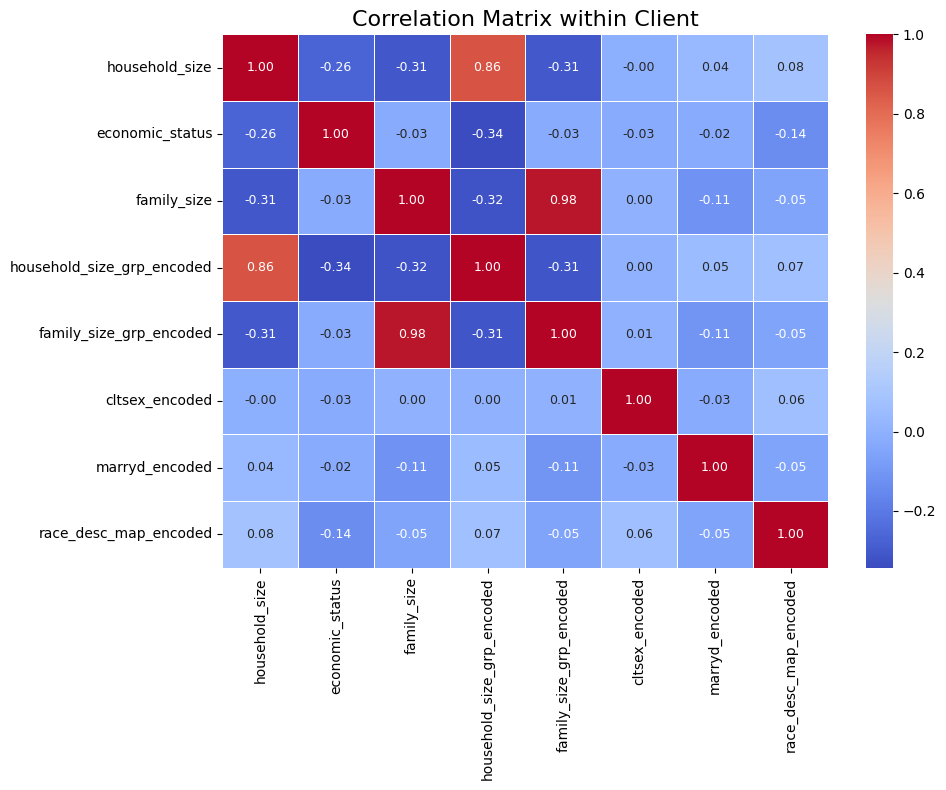

We can drop either the grouped column or its counterpart for client


In [551]:
# dfs["client_encode_test"].iloc[:,6:].head()
correlation_matrix = dfs["client_encoded"].iloc[:,3:].astype(float).corr()


# Assuming `correlation_matrix` contains the correlation values
plt.figure(figsize=(10, 8))  # Increase figure size
sns.heatmap(
    correlation_matrix,
    annot=True,  # Annotate all cells
    fmt=".2f",   # Format annotations to 2 decimal places
    cmap="coolwarm",
    linewidths=0.5,
    annot_kws={"size": 9}  # Adjust annotation font size
)
plt.title("Correlation Matrix within Client", fontsize=16)  # Adjust title size
plt.tight_layout()  # Avoid clipping
plt.show()
print("We can drop either the grouped column or its counterpart for client")

In [552]:
dfs["client_encoded"].drop(columns=["family_size","household_size"], inplace=True) #drop these since clusters easier to classify (and less variations)

In [553]:
dfs["client_encoded"]["client_age"] = 2024 - dfs["client_encoded"]["cltdob"].dt.year
# dfs["client_encoded"].drop(columns=["cltdob"],inplace=True)

In [554]:
print("Initial Client df columns:", len(dfs["client"].columns), "vs. Encoded columns:",len(dfs["client_encoded"].columns))
print("Features in hh size:", len(dfs["client"]["household_size"].unique()), "vs. hh size grp:", len(dfs["client_encoded"]["household_size_grp_encoded"].unique()))

Initial Client df columns: 11 vs. Encoded columns: 10
Features in hh size: 348 vs. hh size grp: 6


In [555]:
#corr between agent age and client age 
#compare pct with flags 
#corr between client's policy vs agent policy flag 
#=Feature Engineering=
#use grp instead of specifics X
#use dummy for HH cluster (lt etc.)  
#pct_product tells you success rate of a policy being deployed - can use this to rank his efficiency?? 
#check corr b/w product expertise & pct success rate - can experiment between the 2
#what else can we do with pct or cluster tho...

<h2>EDA for Agents</h2>

In [556]:
pd.set_option('display.max_columns',None)
dfs["agent"].head()

,agntnum,agent_age,agent_gender,agent_marital,agent_tenure,cnt_converted,annual_premium_cnvrt,pct_lapsed,pct_cancel,pct_inforce,pct_prod_0_cnvrt,pct_prod_1_cnvrt,pct_prod_2_cnvrt,pct_prod_3_cnvrt,pct_prod_4_cnvrt,pct_prod_5_cnvrt,pct_prod_6_cnvrt,pct_prod_7_cnvrt,pct_prod_8_cnvrt,pct_prod_9_cnvrt,pct_SX0_unknown,pct_SX1_male,pct_SX2_female,pct_AG01_lt20,pct_AG02_20to24,pct_AG03_25to29,pct_AG04_30to34,pct_AG05_35to39,pct_AG06_40to44,pct_AG07_45to49,pct_AG08_50to54,pct_AG09_55to59,pct_AG10_60up,cluster,agent_product_expertise
0,AIN:9513,32.0,M,M,15.0,21.0,1.004900e+04,1.0,0.814954,0.000000,0.0,0.0,0.285714,0.0,0.523810,0.0,0.190476,0.0,0.000000,0.000000,0.0,0.333333,0.666667,0.000000,0.238095,0.142857,0.000000,0.000000,0.000000,0.000000,0.238095,0.142857,0.238095,3,"[prod_2, prod_6]"
1,AIN:4310,40.0,M,M,18.0,396.0,1.971080e+05,0.6,0.083937,0.429293,0.0,0.0,0.128788,0.0,0.005051,0.0,0.462121,0.0,0.292929,0.111111,0.0,0.601010,0.398990,0.012626,0.012626,0.131313,0.388889,0.116162,0.184343,0.083333,0.020202,0.040404,0.010101,6,[prod_6]
2,AIN:4302,39.0,F,M,40.0,853.0,5.106351e+05,0.3,0.017406,0.711606,0.0,0.0,0.242673,0.0,0.083236,0.0,0.436108,0.0,0.109027,0.128957,0.0,0.695193,0.304807,0.010551,0.030481,0.137163,0.144197,0.177022,0.311841,0.106682,0.036342,0.035170,0.010551,6,[prod_4]
3,AIN:4996,57.0,F,D,41.0,554.0,3.514724e+05,0.3,0.003623,0.584838,0.0,0.0,0.194946,0.0,0.083032,0.0,0.436823,0.0,0.061372,0.223827,0.0,0.397112,0.602888,0.018051,0.005415,0.009025,0.128159,0.108303,0.234657,0.162455,0.135379,0.160650,0.037906,6,"[prod_7, prod_9, prod_6, prod_0, prod_2]"
4,AIN:3457,38.0,M,M,62.0,1525.0,1.215380e+06,0.3,0.017523,0.640656,0.0,0.0,0.145574,0.0,0.047869,0.0,0.620328,0.0,0.114098,0.072131,0.0,0.626885,0.373115,0.013115,0.035410,0.069508,0.201311,0.215082,0.214426,0.108197,0.084590,0.043279,0.015082,6,"[prod_6, prod_8]"


In [557]:
dfs["agent"].head()

,agntnum,agent_age,agent_gender,agent_marital,agent_tenure,cnt_converted,annual_premium_cnvrt,pct_lapsed,pct_cancel,pct_inforce,pct_prod_0_cnvrt,pct_prod_1_cnvrt,pct_prod_2_cnvrt,pct_prod_3_cnvrt,pct_prod_4_cnvrt,pct_prod_5_cnvrt,pct_prod_6_cnvrt,pct_prod_7_cnvrt,pct_prod_8_cnvrt,pct_prod_9_cnvrt,pct_SX0_unknown,pct_SX1_male,pct_SX2_female,pct_AG01_lt20,pct_AG02_20to24,pct_AG03_25to29,pct_AG04_30to34,pct_AG05_35to39,pct_AG06_40to44,pct_AG07_45to49,pct_AG08_50to54,pct_AG09_55to59,pct_AG10_60up,cluster,agent_product_expertise
0,AIN:9513,32.0,M,M,15.0,21.0,1.004900e+04,1.0,0.814954,0.000000,0.0,0.0,0.285714,0.0,0.523810,0.0,0.190476,0.0,0.000000,0.000000,0.0,0.333333,0.666667,0.000000,0.238095,0.142857,0.000000,0.000000,0.000000,0.000000,0.238095,0.142857,0.238095,3,"[prod_2, prod_6]"
1,AIN:4310,40.0,M,M,18.0,396.0,1.971080e+05,0.6,0.083937,0.429293,0.0,0.0,0.128788,0.0,0.005051,0.0,0.462121,0.0,0.292929,0.111111,0.0,0.601010,0.398990,0.012626,0.012626,0.131313,0.388889,0.116162,0.184343,0.083333,0.020202,0.040404,0.010101,6,[prod_6]
2,AIN:4302,39.0,F,M,40.0,853.0,5.106351e+05,0.3,0.017406,0.711606,0.0,0.0,0.242673,0.0,0.083236,0.0,0.436108,0.0,0.109027,0.128957,0.0,0.695193,0.304807,0.010551,0.030481,0.137163,0.144197,0.177022,0.311841,0.106682,0.036342,0.035170,0.010551,6,[prod_4]
3,AIN:4996,57.0,F,D,41.0,554.0,3.514724e+05,0.3,0.003623,0.584838,0.0,0.0,0.194946,0.0,0.083032,0.0,0.436823,0.0,0.061372,0.223827,0.0,0.397112,0.602888,0.018051,0.005415,0.009025,0.128159,0.108303,0.234657,0.162455,0.135379,0.160650,0.037906,6,"[prod_7, prod_9, prod_6, prod_0, prod_2]"
4,AIN:3457,38.0,M,M,62.0,1525.0,1.215380e+06,0.3,0.017523,0.640656,0.0,0.0,0.145574,0.0,0.047869,0.0,0.620328,0.0,0.114098,0.072131,0.0,0.626885,0.373115,0.013115,0.035410,0.069508,0.201311,0.215082,0.214426,0.108197,0.084590,0.043279,0.015082,6,"[prod_6, prod_8]"


In [558]:
dfs["agent_encoded"] = dfs["agent"].copy()
for col in ["agent_gender","agent_marital"]: 
    encoder = LabelEncoder()
    dfs["agent_encoded"][f"{col}_encoded"] = encoder.fit_transform(dfs["agent_encoded"][col])

dfs["agent_encoded"].drop(columns = ["agent_gender","agent_marital", "agent_product_expertise"],inplace=True) #Can add back agent product expertise as dummies

In [559]:
# dfs["agent_corr"]=dfs["agent"].copy()
# dfs["agent_corr"].drop(columns=["agent_product_expertise","agentnum"])

In [560]:
dfs["agent_encoded"].head()

,agntnum,agent_age,agent_tenure,cnt_converted,annual_premium_cnvrt,pct_lapsed,pct_cancel,pct_inforce,pct_prod_0_cnvrt,pct_prod_1_cnvrt,pct_prod_2_cnvrt,pct_prod_3_cnvrt,pct_prod_4_cnvrt,pct_prod_5_cnvrt,pct_prod_6_cnvrt,pct_prod_7_cnvrt,pct_prod_8_cnvrt,pct_prod_9_cnvrt,pct_SX0_unknown,pct_SX1_male,pct_SX2_female,pct_AG01_lt20,pct_AG02_20to24,pct_AG03_25to29,pct_AG04_30to34,pct_AG05_35to39,pct_AG06_40to44,pct_AG07_45to49,pct_AG08_50to54,pct_AG09_55to59,pct_AG10_60up,cluster,agent_gender_encoded,agent_marital_encoded
0,AIN:9513,32.0,15.0,21.0,1.004900e+04,1.0,0.814954,0.000000,0.0,0.0,0.285714,0.0,0.523810,0.0,0.190476,0.0,0.000000,0.000000,0.0,0.333333,0.666667,0.000000,0.238095,0.142857,0.000000,0.000000,0.000000,0.000000,0.238095,0.142857,0.238095,3,1,1
1,AIN:4310,40.0,18.0,396.0,1.971080e+05,0.6,0.083937,0.429293,0.0,0.0,0.128788,0.0,0.005051,0.0,0.462121,0.0,0.292929,0.111111,0.0,0.601010,0.398990,0.012626,0.012626,0.131313,0.388889,0.116162,0.184343,0.083333,0.020202,0.040404,0.010101,6,1,1
2,AIN:4302,39.0,40.0,853.0,5.106351e+05,0.3,0.017406,0.711606,0.0,0.0,0.242673,0.0,0.083236,0.0,0.436108,0.0,0.109027,0.128957,0.0,0.695193,0.304807,0.010551,0.030481,0.137163,0.144197,0.177022,0.311841,0.106682,0.036342,0.035170,0.010551,6,0,1
3,AIN:4996,57.0,41.0,554.0,3.514724e+05,0.3,0.003623,0.584838,0.0,0.0,0.194946,0.0,0.083032,0.0,0.436823,0.0,0.061372,0.223827,0.0,0.397112,0.602888,0.018051,0.005415,0.009025,0.128159,0.108303,0.234657,0.162455,0.135379,0.160650,0.037906,6,0,0
4,AIN:3457,38.0,62.0,1525.0,1.215380e+06,0.3,0.017523,0.640656,0.0,0.0,0.145574,0.0,0.047869,0.0,0.620328,0.0,0.114098,0.072131,0.0,0.626885,0.373115,0.013115,0.035410,0.069508,0.201311,0.215082,0.214426,0.108197,0.084590,0.043279,0.015082,6,1,1


['pct_prod_0_cnvrt', 'pct_prod_1_cnvrt', 'pct_prod_2_cnvrt', 'pct_prod_3_cnvrt', 'pct_prod_4_cnvrt', 'pct_prod_5_cnvrt', 'pct_prod_6_cnvrt', 'pct_prod_7_cnvrt', 'pct_prod_8_cnvrt', 'pct_prod_9_cnvrt', 'cluster', 'agent_tenure']


<Axes: >

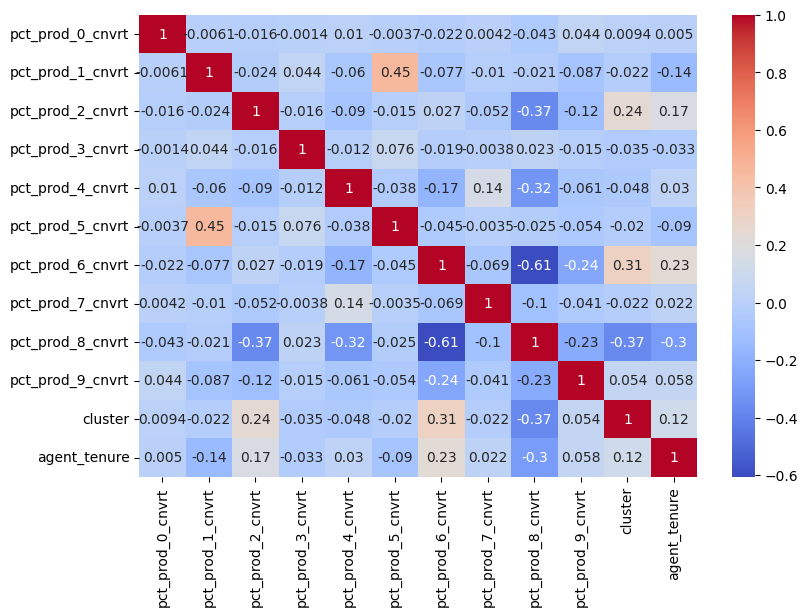

In [561]:
products_cnvrt = [f"pct_prod_{i}_cnvrt" for i in range(0,10)]
products_cnvrt+= ["cluster","agent_tenure"]
print(products_cnvrt)

correlation_matrix = dfs["agent_encoded"].loc[:,products_cnvrt].corr()

plt.figure(figsize=(9,6))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap="coolwarm")

['pct_prod_0_cnvrt', 'pct_prod_1_cnvrt', 'pct_prod_2_cnvrt', 'pct_prod_3_cnvrt', 'pct_prod_4_cnvrt', 'pct_prod_5_cnvrt', 'pct_prod_6_cnvrt', 'pct_prod_7_cnvrt', 'pct_prod_8_cnvrt', 'pct_prod_9_cnvrt', 'agent_age', 'agent_tenure', 'cnt_converted', 'annual_premium_cnvrt', 'pct_inforce', 'agent_marital_encoded', 'agent_gender_encoded', 'cluster']


<Axes: >

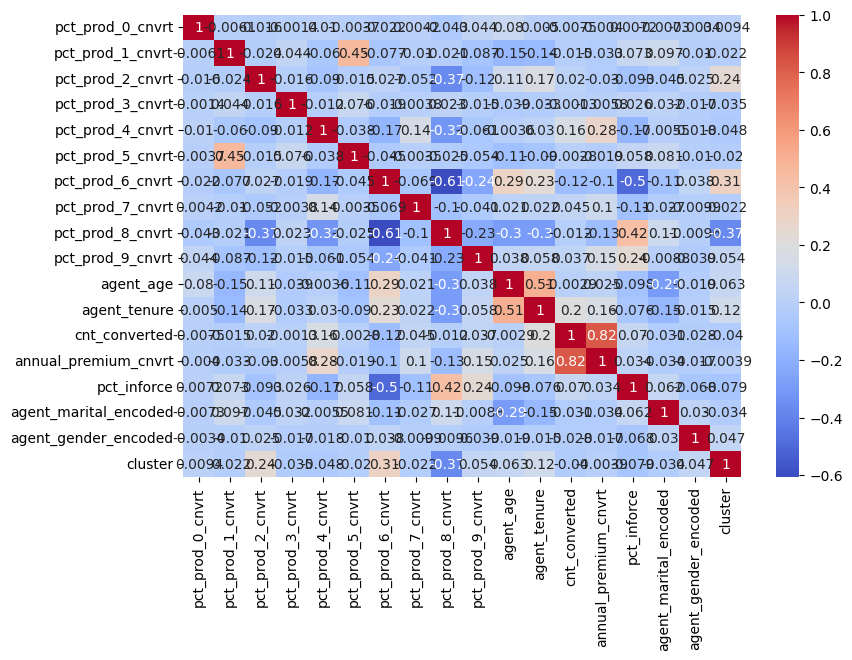

In [562]:
products_cnvrt = [f"pct_prod_{i}_cnvrt" for i in range(0,10)]
products_cnvrt += ["agent_age","agent_tenure","cnt_converted","annual_premium_cnvrt","pct_inforce","agent_marital_encoded","agent_gender_encoded","cluster"]
print(products_cnvrt)

correlation_matrix = dfs["agent_encoded"].loc[:,products_cnvrt].corr()

plt.figure(figsize=(9,6))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap="coolwarm")

In [563]:
print("Indices of Age-based cnvrt:",list(dfs["agent_encoded"].columns).index("pct_AG01_lt20"),":", list(dfs["agent_encoded"].columns).index('pct_AG10_60up'))

Indices of Age-based cnvrt: 21 : 30


In [564]:
age_cnvrt_df = dfs["agent_encoded"].iloc[:,21:30]
age_cnvrt_df["age_total_cnvrt"] = age_cnvrt_df.sum(axis=1)
age_cnvrt_df["agent_age"] = dfs["agent_encoded"]["agent_age"]
age_cnvrt_df["cluster"] = dfs["agent_encoded"]["cluster"]


<Axes: >

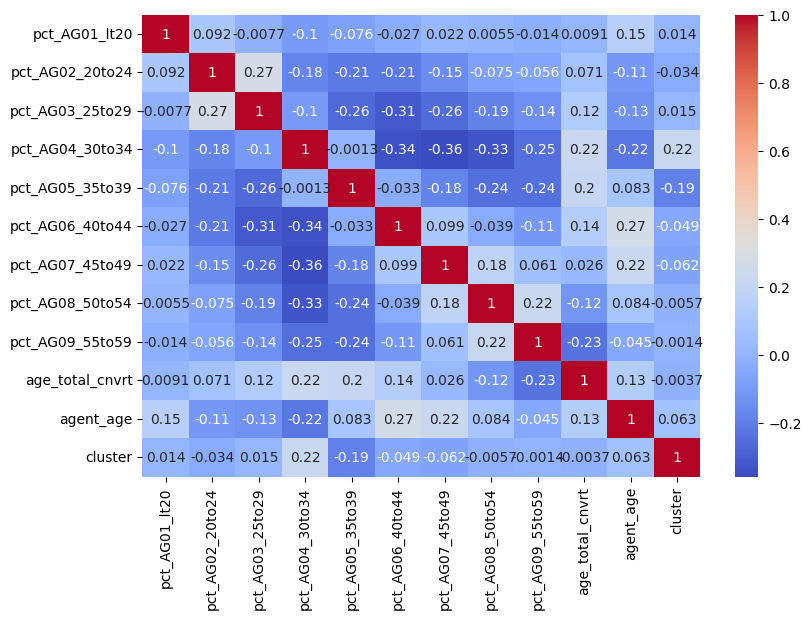

In [565]:
correlation_matrix = age_cnvrt_df.corr()

plt.figure(figsize=(9,6))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap="coolwarm")

<Axes: >

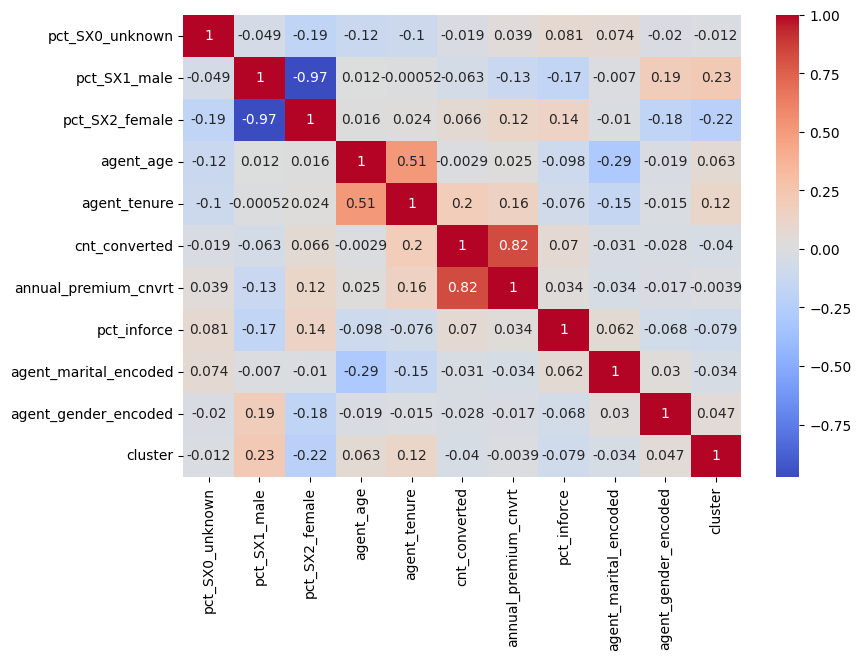

In [566]:
pct_sex = ["pct_SX0_unknown","pct_SX1_male",	"pct_SX2_female"]
pct_sex += ["agent_age","agent_tenure","cnt_converted","annual_premium_cnvrt","pct_inforce","agent_marital_encoded","agent_gender_encoded","cluster"]

correlation_matrix = dfs["agent_encoded"].loc[:,pct_sex].corr()

plt.figure(figsize=(9,6))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap="coolwarm")

In [567]:
dfs["agent_encoded"].drop(columns=["pct_SX2_female"],inplace=True) #drop one gender column since high corr

In [568]:
pdts_in_policy_df = dfs["policy"]["product"].unique()
print(len(pdts_in_policy_df), pdts_in_policy_df)

7 ['prod_8' 'prod_6' 'prod_4' 'prod_2' 'prod_9' 'prod_7' 'prod_0']


In [569]:
#Policy data shows range for age... worth converting the customers age into tiers as well... same for tenure 
#Product 1 and 3 cld be dropped
dfs["agent"][[f"pct_prod_{i}_cnvrt" for i in range(0,10)]].sum(axis=0) #cld drop this

pct_prod_0_cnvrt       5.881897
pct_prod_1_cnvrt     101.835524
pct_prod_2_cnvrt    1010.831442
pct_prod_3_cnvrt       1.866970
pct_prod_4_cnvrt     815.009106
pct_prod_5_cnvrt      19.936241
pct_prod_6_cnvrt    2165.998331
pct_prod_7_cnvrt      75.845880
pct_prod_8_cnvrt    4732.991273
pct_prod_9_cnvrt    1188.468118
dtype: float64

<Axes: >

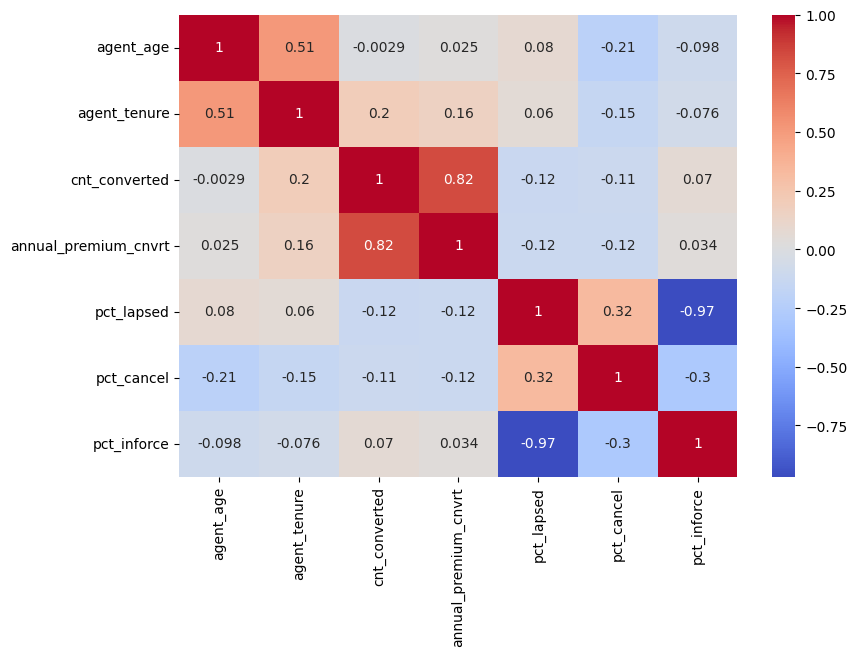

In [570]:
other_agent_details = dfs["agent_encoded"].loc[:,"agent_age":"pct_inforce"].corr()
plt.figure(figsize=(9,6))
sns.heatmap(other_agent_details,
            annot=True,
            cmap="coolwarm")

In [571]:
dfs["agent_encoded"].drop(columns=["pct_lapsed"],inplace=True)

In [572]:
dfs["agent_encoded"]

,agntnum,agent_age,agent_tenure,cnt_converted,annual_premium_cnvrt,pct_cancel,pct_inforce,pct_prod_0_cnvrt,pct_prod_1_cnvrt,pct_prod_2_cnvrt,pct_prod_3_cnvrt,pct_prod_4_cnvrt,pct_prod_5_cnvrt,pct_prod_6_cnvrt,pct_prod_7_cnvrt,pct_prod_8_cnvrt,pct_prod_9_cnvrt,pct_SX0_unknown,pct_SX1_male,pct_AG01_lt20,pct_AG02_20to24,pct_AG03_25to29,pct_AG04_30to34,pct_AG05_35to39,pct_AG06_40to44,pct_AG07_45to49,pct_AG08_50to54,pct_AG09_55to59,pct_AG10_60up,cluster,agent_gender_encoded,agent_marital_encoded
0,AIN:9513,32.0,15.0,21.0,1.004900e+04,0.814954,0.000000,0.00000,0.0,0.285714,0.0,0.523810,0.0,0.190476,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.238095,0.142857,0.000000,0.000000,0.000000,0.000000,0.238095,0.142857,0.238095,3,1,1
1,AIN:4310,40.0,18.0,396.0,1.971080e+05,0.083937,0.429293,0.00000,0.0,0.128788,0.0,0.005051,0.0,0.462121,0.000000,0.292929,0.111111,0.000000,0.601010,0.012626,0.012626,0.131313,0.388889,0.116162,0.184343,0.083333,0.020202,0.040404,0.010101,6,1,1
2,AIN:4302,39.0,40.0,853.0,5.106351e+05,0.017406,0.711606,0.00000,0.0,0.242673,0.0,0.083236,0.0,0.436108,0.000000,0.109027,0.128957,0.000000,0.695193,0.010551,0.030481,0.137163,0.144197,0.177022,0.311841,0.106682,0.036342,0.035170,0.010551,6,0,1
3,AIN:4996,57.0,41.0,554.0,3.514724e+05,0.003623,0.584838,0.00000,0.0,0.194946,0.0,0.083032,0.0,0.436823,0.000000,0.061372,0.223827,0.000000,0.397112,0.018051,0.005415,0.009025,0.128159,0.108303,0.234657,0.162455,0.135379,0.160650,0.037906,6,0,0
4,AIN:3457,38.0,62.0,1525.0,1.215380e+06,0.017523,0.640656,0.00000,0.0,0.145574,0.0,0.047869,0.0,0.620328,0.000000,0.114098,0.072131,0.000000,0.626885,0.013115,0.035410,0.069508,0.201311,0.215082,0.214426,0.108197,0.084590,0.043279,0.015082,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,AIN:2805,34.0,57.0,176.0,3.547658e+05,0.022383,0.812500,0.00000,0.0,0.000000,0.0,0.977273,0.0,0.000000,0.022727,0.000000,0.000000,0.000000,0.267045,0.090909,0.051136,0.142045,0.136364,0.034091,0.125000,0.130682,0.079545,0.193182,0.017045,4,0,3
10125,AIN:6195,33.0,31.0,28.0,6.802000e+03,0.000000,0.392857,0.00000,0.0,0.107143,0.0,0.000000,0.0,0.892857,0.000000,0.000000,0.000000,0.000000,0.535714,0.000000,0.071429,0.142857,0.392857,0.000000,0.107143,0.250000,0.035714,0.000000,0.000000,6,1,2
10126,AIN:8096,45.0,54.0,124.0,4.683500e+04,0.000000,0.362903,0.00000,0.0,0.024194,0.0,0.000000,0.0,0.975806,0.000000,0.000000,0.000000,0.000000,0.637097,0.024194,0.072581,0.096774,0.387097,0.088710,0.072581,0.104839,0.129032,0.024194,0.000000,9,1,1
10127,AIN:389,55.0,119.0,2303.0,8.047220e+05,0.000874,0.000000,0.00000,0.0,0.000000,0.0,0.996092,0.0,0.003908,0.000000,0.000000,0.000000,0.000000,0.323491,0.037343,0.148502,0.150673,0.141989,0.145462,0.140252,0.124620,0.082067,0.028224,0.000868,3,0,1


<h2>EDA for Policy</h2>

In [573]:
dfs["policy"].head()

,chdrnum,agntnum,secuityno,occdate,annual_premium,product,flg_main,flg_rider,flg_inforce,flg_lapsed,flg_cancel,flg_expire,flg_converted,product_grp,cust_age_at_purchase_grp,cust_tenure_at_purchase_grp
0,PID:281,AIN:62,CIN:6957,2018-11-12,0.0,prod_8,1,0,1,0,0,0,1,PG:0,AG05_35to39,TNR2_lt1yr
1,PID:280,AIN:63,CIN:2161,2024-02-22,7.0,prod_8,1,0,1,0,0,0,1,PG:0,AG04_30to34,TNR4_4to8yr
2,PID:2577,AIN:63,CIN:16605,2024-08-28,423.0,prod_6,1,0,1,0,0,0,1,PG:0,AG08_50to54,TNR5_8yrup
3,PID:2578,AIN:63,CIN:16605,2024-08-27,217.0,prod_6,1,0,1,0,0,0,1,PG:0,AG08_50to54,TNR5_8yrup
4,PID:305,AIN:63,CIN:7917,2024-08-28,432.0,prod_6,1,0,1,0,0,0,1,PG:0,AG07_45to49,TNR4_4to8yr


In [574]:
policy_df = dfs["policy"].copy()
policy_df["cust_tenure_at_purchase_grp"].unique()

encoder = OrdinalEncoder(categories=[['TNR2_lt1yr', 'TNR3_1to4yr','TNR4_4to8yr','TNR5_8yrup']])
policy_df["cust_tenure_at_purchase_grp_encoded"] = encoder.fit_transform(policy_df[["cust_tenure_at_purchase_grp"]])
policy_df.drop(columns=["cust_tenure_at_purchase_grp"],inplace=True)

encoder = OrdinalEncoder(categories=[['AG05_35to39', 'AG04_30to34', 'AG08_50to54', 'AG07_45to49',
       'AG09_55to59', 'AG06_40to44', 'AG10_60up', 'AG03_25to29',
       'AG02_20to24', 'AG01_lt20', 'AG00_missing']])
policy_df["cust_age_at_purchase_grp_encoded"] = encoder.fit_transform(policy_df[["cust_age_at_purchase_grp"]])
policy_df.drop(columns=["cust_age_at_purchase_grp"],inplace=True)
policy_df.head()

policy_df["product"] = policy_df["product"].apply(lambda x: float(x[-1]))
policy_df["product_grp"] = policy_df["product_grp"].apply(lambda x: float(x[-1]))
policy_df.head()

,chdrnum,agntnum,secuityno,occdate,annual_premium,product,flg_main,flg_rider,flg_inforce,flg_lapsed,flg_cancel,flg_expire,flg_converted,product_grp,cust_tenure_at_purchase_grp_encoded,cust_age_at_purchase_grp_encoded
0,PID:281,AIN:62,CIN:6957,2018-11-12,0.0,8.0,1,0,1,0,0,0,1,0.0,0.0,0.0
1,PID:280,AIN:63,CIN:2161,2024-02-22,7.0,8.0,1,0,1,0,0,0,1,0.0,2.0,1.0
2,PID:2577,AIN:63,CIN:16605,2024-08-28,423.0,6.0,1,0,1,0,0,0,1,0.0,3.0,2.0
3,PID:2578,AIN:63,CIN:16605,2024-08-27,217.0,6.0,1,0,1,0,0,0,1,0.0,3.0,2.0
4,PID:305,AIN:63,CIN:7917,2024-08-28,432.0,6.0,1,0,1,0,0,0,1,0.0,2.0,3.0


In [575]:
dfs["policy_encoded"] = policy_df.copy()

In [576]:
df_merged = pd.merge(dfs['policy_encoded'], dfs['client_encoded'], on='secuityno', how='inner')

df_merged = pd.merge(df_merged, dfs['agent_encoded'], on='agntnum', how='inner')

In [577]:
#Tenure calc: 
# df_merged["occdate"].dt.year - df_merged["cltdob"].dt.year

In [578]:
df_merged.head()

,chdrnum,agntnum,secuityno,occdate,annual_premium,product,flg_main,flg_rider,flg_inforce,flg_lapsed,flg_cancel,flg_expire,flg_converted,product_grp,cust_tenure_at_purchase_grp_encoded,cust_age_at_purchase_grp_encoded,cltdob,cltpcode,economic_status,household_size_grp_encoded,family_size_grp_encoded,cltsex_encoded,marryd_encoded,race_desc_map_encoded,client_age,agent_age,agent_tenure,cnt_converted,annual_premium_cnvrt,pct_cancel,pct_inforce,pct_prod_0_cnvrt,pct_prod_1_cnvrt,pct_prod_2_cnvrt,pct_prod_3_cnvrt,pct_prod_4_cnvrt,pct_prod_5_cnvrt,pct_prod_6_cnvrt,pct_prod_7_cnvrt,pct_prod_8_cnvrt,pct_prod_9_cnvrt,pct_SX0_unknown,pct_SX1_male,pct_AG01_lt20,pct_AG02_20to24,pct_AG03_25to29,pct_AG04_30to34,pct_AG05_35to39,pct_AG06_40to44,pct_AG07_45to49,pct_AG08_50to54,pct_AG09_55to59,pct_AG10_60up,cluster,agent_gender_encoded,agent_marital_encoded
0,PID:281,AIN:62,CIN:6957,2018-11-12,0.0,8.0,1,0,1,0,0,0,1,0.0,0.0,0.0,1982-03-11,648146,78,1.0,5.0,0,1,0,42,31.0,6.0,47.0,6112.000,0.243689,0.936170,0.0,0.212766,0.319149,0.0,0.000000,0.000000,0.042553,0.000000,0.425532,0.00000,0.042553,0.531915,0.000000,0.000000,0.106383,0.148936,0.297872,0.148936,0.191489,0.000000,0.000000,0.000000,1,1,2
1,PID:280,AIN:63,CIN:2161,2024-02-22,7.0,8.0,1,0,1,0,0,0,1,0.0,2.0,1.0,1991-03-18,680120,31,2.0,3.0,1,3,0,33,32.0,71.0,4560.0,1045929.756,0.157312,0.854605,0.0,0.041009,0.051974,0.0,0.010307,0.033333,0.063596,0.007237,0.761404,0.03114,0.024561,0.605263,0.009649,0.022149,0.050439,0.260307,0.212719,0.181360,0.121711,0.071711,0.019956,0.011842,1,1,2
2,PID:2577,AIN:63,CIN:16605,2024-08-28,423.0,6.0,1,0,1,0,0,0,1,0.0,3.0,2.0,1973-04-16,640818,30,2.0,4.0,1,1,0,51,32.0,71.0,4560.0,1045929.756,0.157312,0.854605,0.0,0.041009,0.051974,0.0,0.010307,0.033333,0.063596,0.007237,0.761404,0.03114,0.024561,0.605263,0.009649,0.022149,0.050439,0.260307,0.212719,0.181360,0.121711,0.071711,0.019956,0.011842,1,1,2
3,PID:2578,AIN:63,CIN:16605,2024-08-27,217.0,6.0,1,0,1,0,0,0,1,0.0,3.0,2.0,1973-04-16,640818,30,2.0,4.0,1,1,0,51,32.0,71.0,4560.0,1045929.756,0.157312,0.854605,0.0,0.041009,0.051974,0.0,0.010307,0.033333,0.063596,0.007237,0.761404,0.03114,0.024561,0.605263,0.009649,0.022149,0.050439,0.260307,0.212719,0.181360,0.121711,0.071711,0.019956,0.011842,1,1,2
4,PID:305,AIN:63,CIN:7917,2024-08-28,432.0,6.0,1,0,1,0,0,0,1,0.0,2.0,3.0,1978-06-20,760401,00,1.0,3.0,0,1,2,46,32.0,71.0,4560.0,1045929.756,0.157312,0.854605,0.0,0.041009,0.051974,0.0,0.010307,0.033333,0.063596,0.007237,0.761404,0.03114,0.024561,0.605263,0.009649,0.022149,0.050439,0.260307,0.212719,0.181360,0.121711,0.071711,0.019956,0.011842,1,1,2


In [579]:
[i for i in list(df_merged.columns) if "encoded" in i]

['cust_tenure_at_purchase_grp_encoded',
 'cust_age_at_purchase_grp_encoded',
 'household_size_grp_encoded',
 'family_size_grp_encoded',
 'cltsex_encoded',
 'marryd_encoded',
 'race_desc_map_encoded',
 'agent_gender_encoded',
 'agent_marital_encoded']

In [597]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

# Drop unnecessary columns
df_final = df_merged.drop(columns=["occdate","chdrnum", "secuityno", "cluster","cltdob"])

# Convert date columns into numerical values
# df_final["occdate"] = pd.to_datetime(df_final["occdate"])
# df_final["policy_tenure"] = 2025 - df_final["occdate"].dt.year  # Convert policy inception year

# df_final["cltdob"] = pd.to_datetime(df_final["cltdob"])
# df_final["cust_age"] = 2025 - df_final["cltdob"].dt.year  # Convert birth year to age

# Drop original date columns after transformation

# Define target variable (y) and feature variables (X)
y = df_final["agntnum"]  # Target: Agent ID
X = df_final.drop(columns=["agntnum"])  # Features
X_train_resampled, X_test, y_train_resampled, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# # Apply undersampling only on the training data
# X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Encode categorical variables
categorical_cols = [
    "agent_gender_encoded", "agent_marital_encoded", "product", "product_grp",
    "cust_age_at_purchase_grp_encoded", "cust_tenure_at_purchase_grp_encoded", "cltsex_encoded",
    "marryd_encoded", "race_desc_map_encoded", "household_size_grp_encoded", "family_size_grp_encoded",
    "pct_SX1_male",
]

    

# Scale numerical features
scaler = StandardScaler()
numerical_cols = [
    "agent_age", "agent_tenure", "cnt_converted", "annual_premium_cnvrt",
     "pct_cancel", "pct_inforce", "annual_premium", "pct_AG01_lt20",	
     "pct_AG02_20to24",	"pct_AG03_25to29",	"pct_AG04_30to34",	"pct_AG05_35to39",	
     "pct_AG06_40to44",	"pct_AG07_45to49",	"pct_AG08_50to54",	"pct_AG09_55to59",	
     "pct_AG10_60up"
]
numerical_cols += [f"pct_prod_{i}_cnvrt" for i in range(0,10)]
X_train_resampled[numerical_cols] = scaler.fit_transform(X_train_resampled[numerical_cols])

scaler = StandardScaler()
X_test[numerical_cols] = scaler.fit_transform(X_test[numerical_cols])

# Split data into 80% train and 20% test


# Print dataset shapes
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Display sample rows
print("\nX_train sample:")
print(X_train_resampled.head())

print("\ny_train sample:")
print(y_train_resampled.head())


X_train shape: (23176, 50)
X_test shape: (5794, 50)
y_train shape: (23176,)
y_test shape: (5794,)

X_train sample:
       annual_premium  product  flg_main  flg_rider  flg_inforce  flg_lapsed  \
7125        -0.236230      8.0         1          0            1           0   
21687        0.208655      4.0         1          0            1           0   
3732        -0.146127      6.0         1          0            0           1   
6379        -0.212127      6.0         1          0            1           0   
11326        0.171487      8.0         1          0            1           0   

       flg_cancel  flg_expire  flg_converted  product_grp  \
7125            0           0              1          0.0   
21687           0           0              1          1.0   
3732            0           0              1          0.0   
6379            0           0              1          0.0   
11326           0           0              1          0.0   

       cust_tenure_at_purchase_grp_en

In [598]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(
    criterion='gini',  # or 'entropy'      # Adjust depth based on complexity
    random_state=42
)

# Train the model
dt_model.fit(X_train_resampled, y_train_resampled)


DecisionTreeClassifier(random_state=42)

In [599]:
# Predict on test set
y_pred = dt_model.predict(X_test)

In [601]:
# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Decision Tree Accuracy: 0.4270

Classification Report:
              precision    recall  f1-score   support

       AIN:0       0.00      0.00      0.00         1
       AIN:1       1.00      1.00      1.00         1
      AIN:10       0.00      0.00      0.00         2
    AIN:1000       0.00      0.00      0.00         0
   AIN:10005       0.00      0.00      0.00         0
   AIN:10007       0.00      0.00      0.00         1
   AIN:10009       0.00      0.00      0.00         2
    AIN:1001       1.00      1.00      1.00         3
   AIN:10011       1.00      1.00      1.00         1
   AIN:10012       0.00      0.00      0.00         1
   AIN:10013       0.00      0.00      0.00         1
    AIN:1002       0.00      0.00      0.00         3
   AIN:10020       0.00      0.00      0.00         2
   AIN:10021       0.00      0.00      0.00         1
   AIN:10026       0.00      0.00      0.00         1
   AIN:10027       0.00      0.00      0.00         0
   AIN:10029       0.00   

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_pr

In [585]:
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split

# Define reader (Ensure rating_scale matches your data)
reader = Reader(rating_scale=(0, 1))  # Example: Binary interaction (1 = active, 0 = inactive)

# Load dataset
data = Dataset.load_from_df(df_merged[['secuityno', 'agntnum', 'pct_inforce']], reader)

# Convert your existing train-test split into Surprise format
trainset = data.build_full_trainset()  # Use all data to train
testset = trainset.build_testset()  # Generate testset for evaluation
model = SVD(n_factors=100, n_epochs=20, random_state=42)
model.fit(trainset)
model = SVD(n_factors=100, n_epochs=20, random_state=42)
model.fit(trainset)
predictions = model.test(testset)
# RMSE (Root Mean Square Error)
rmse_score = accuracy.rmse(predictions)

# MAE (Mean Absolute Error)
mae_score = accuracy.mae(predictions)

print(f"\nFinal Model Evaluation:\n RMSE: {rmse_score:.4f}\n MAE: {mae_score:.4f}")
from sklearn.metrics import r2_score

# Extract actual and predicted values
y_true = [pred.r_ui for pred in predictions]  # Actual ratings
y_pred = [pred.est for pred in predictions]  # Predicted ratings

# Compute R²
r2 = r2_score(y_true, y_pred)
print(f"R² Score: {r2:.4f}")

RMSE: 0.1575
MAE:  0.1087

Final Model Evaluation:
 RMSE: 0.1575
 MAE: 0.1087
R² Score: 0.7238
